In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import *
from keras.layers import *
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import ResNet50V2
import tensorflow as tf

In [ ]:
!wget http://cb.lk/covid_19

--2023-04-10 08:12:22--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2023-04-10 08:12:22--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2023-04-10 08:12:23--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb63

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os
main_dir="/content/CovidDataset"
train_data=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)

train_dir=os.path.join(main_dir ,'Train')
training_set = train_data.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32,class_mode='categorical')

test_dir=os.path.join(main_dir ,'Val')
test_set = test_data.flow_from_directory(test_dir,target_size=(224, 224),batch_size=32,class_mode='categorical')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
base_model=ResNet50V2(include_top=False , weights='imagenet')
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512 ,activation='relu')(x)
x=Dense(128 ,activation='relu')(x)
predictions=Dense(2 ,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
    
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

94668760/94668760 [==============================] - 5s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

In [ ]:
results=model.fit(training_set ,epochs=10,validation_data=[test_set],verbose=1 ,batch_size=32)

Epoch 1/10
7/7 [==============================] - 8s 1s/step - loss: 2.5192e-04 - accuracy: 1.0000 - val_loss: 0.0416 - val_accuracy: 0.9667
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 3.0398e-04 - accuracy: 1.0000 - val_loss: 0.0409 - val_accuracy: 0.9667
Epoch 3/10
7/7 [==============================] - 7s 1s/step - loss: 2.1212e-04 - accuracy: 1.0000 - val_loss: 0.0319 - val_accuracy: 0.9833
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 1.3329e-04 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 0.9833
Epoch 5/10
7/7 [==============================] - 8s 1s/step - loss: 1.0288e-04 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 7s 1s/step - loss: 8.7736e-05 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 7s 1s/step - loss: 7.7955e-05 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 8/10
7/

In [ ]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

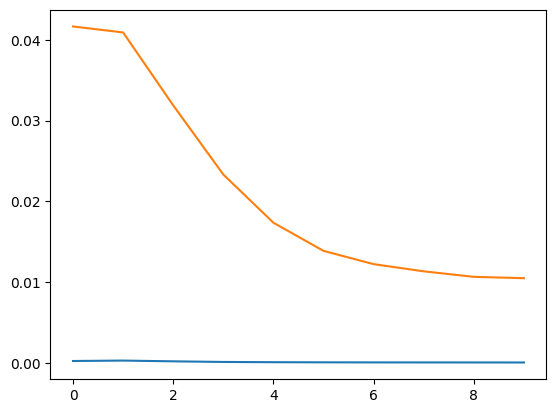

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

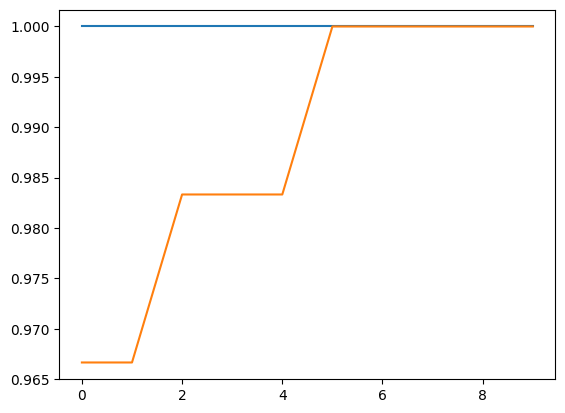

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])